#### Extracting maximum business value through intensive data analysis

# Analysis of 1972 specific items auctioned on eBay. Kernel by Javier Marti

Here we analyze a dataset of 1972 online auction transactions. 
What is the data trying to tell us? What can we find out about the patterns and relationships contained within it? Our analysis will let us dive into the numbers to get important information on this market, for the period shown. 
I will also point to specific areas for further investigation, based on the numbers presented here. 
We shall proceed to clean the data first, and then to extract conclusions from it.

In [91]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

df = pd.read_excel('ebay_sales_dataset.xlsx', 'eBay auctions')

#Let's have a preview of the data, and how it's organized
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


# Some of the questions we'll be trying to answer...
- What are the categories in which there is less competition?
- What are the categories that sell items for the highest close prices?
- What are the categories with the widest difference between opening price and close price?
- Is there any correlation in the data?

Note: at the time of performing this exercise, there is approximate parity between the Euro, GBP and US$ currencies, thus, differences in currency will be hereforth ignored.

In [92]:
#Proceeding with further inspection of the data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
Category        1972 non-null object
currency        1972 non-null object
sellerRating    1972 non-null int64
Duration        1972 non-null int64
endDay          1972 non-null object
ClosePrice      1972 non-null float64
OpenPrice       1972 non-null float64
Competitive?    1972 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 123.3+ KB


In [93]:
#What are the main stats?
df.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


# Several things already catch our attention:
- Standard deviation for sellerRating seems very high. There is a wide range of sellers with very different reputation levels bidding for auction items
- Very high max score in SellerRating may point to outlier/s. Requires further investigation
- Very high max score in ClosePrice may point to outlier/s. Requires further investigation
- Very low min score in ClosePrice may point to outlier/s, unless some products were actually sold for $0.01. Requires further investigation
- Very low standard deviation in the Competitive data range may indicate a very crowded and competitive market for most items on sale. Pending verification
- The "Competitive?" column could be useful to us if we knew how its values were computed. However, since we do not have this information, we can proceed to delete it, as part of the data-cleansing process. 

In [94]:
#Proceeding to delete "Competitive?" column
del df['Competitive?']
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01


# Let's now do some basic graphing of the data, in order to spot potential outliers or data anomalies...

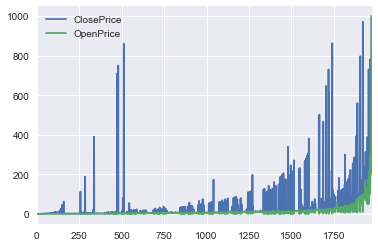

In [95]:
test = df[['ClosePrice', 'OpenPrice']].plot()

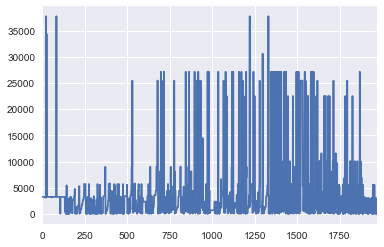

In [96]:
test = df.sellerRating.plot()

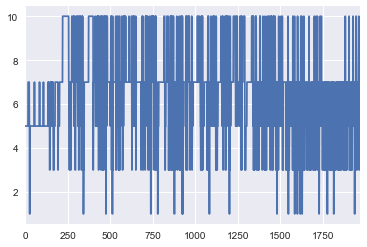

In [97]:
test = df.Duration.plot()

In [98]:
#What are the categories present?
df.Category.unique()

array([u'Music/Movie/Game', u'Automotive', u'SportingGoods',
       u'Home/Garden', u'Books', u'Collectibles', u'Business/Industrial',
       u'Toys/Hobbies', u'Electronics', u'Computer', u'EverythingElse',
       u'Clothing/Accessories', u'Coins/Stamps', u'Antique/Art/Craft',
       u'Jewelry', u'Pottery/Glass', u'Health/Beauty', u'Photography'], dtype=object)

In [99]:
#What are the main stats for the categories?
df.Category.describe()

count                 1972
unique                  18
top       Music/Movie/Game
freq                   403
Name: Category, dtype: object

In [100]:
#How many items of each category have been sold?
df.Category.value_counts()

Music/Movie/Game        403
Collectibles            239
Toys/Hobbies            234
Automotive              178
Antique/Art/Craft       177
SportingGoods           124
Clothing/Accessories    119
Home/Garden             102
Jewelry                  82
Health/Beauty            64
Electronics              55
Books                    54
Coins/Stamps             37
Computer                 36
Pottery/Glass            20
Business/Industrial      18
EverythingElse           17
Photography              13
Name: Category, dtype: int64

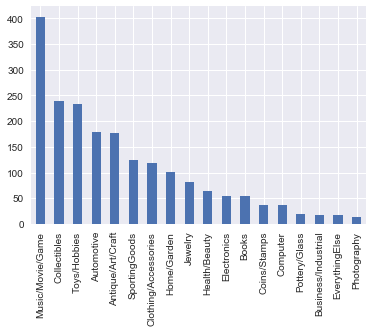

In [101]:
#How many items in each category? 
df.Category.value_counts().plot(kind = 'bar')

In [102]:
#Are there any null values in the dataset?
df.isnull().sum()

Category        0
currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
dtype: int64

Mon    548
Sat    351
Sun    338
Fri    287
Thu    202
Tue    171
Wed     75
Name: endDay, dtype: int64


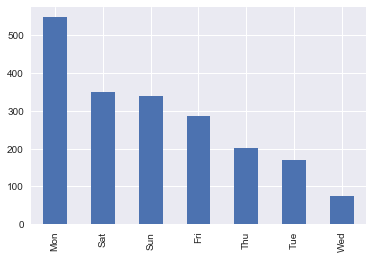

In [103]:
#What's the most popular day in which auctions end?
print(df.endDay.value_counts())
df.endDay.value_counts().plot(kind = 'bar')

# As we can see below, the best days to end the sale (highest mean close price) seem to be Sunday, followed by Friday and Saturday

In [104]:
#As we can see below, the best days to end the sale (highest mean close price) seem to be Sunday, followed by Friday and Saturday 
df.groupby('endDay').ClosePrice.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
endDay,,,,,,,,
Sun,338.0,41.936657,90.012071,0.99,5.6825,14.950,38.5875,780.89
Fri,287.0,40.192648,105.353240,0.11,5.5000,11.680,23.0000,860.00
Sat,351.0,40.152108,113.689079,0.99,4.9900,9.990,26.6450,999.00
Mon,548.0,38.053723,88.196693,0.01,3.9900,9.445,29.2475,863.28
Wed,75.0,31.474933,76.339273,1.23,2.4600,11.070,28.1850,501.32
Tue,171.0,27.698713,36.700512,0.01,6.1550,15.860,35.3300,256.00
Thu,202.0,20.414802,42.021151,0.98,3.5500,8.390,15.2325,339.09


In [105]:
df.endDay.isnull().value_counts()

False    1972
Name: endDay, dtype: int64

# What's the variability in price as per product category?

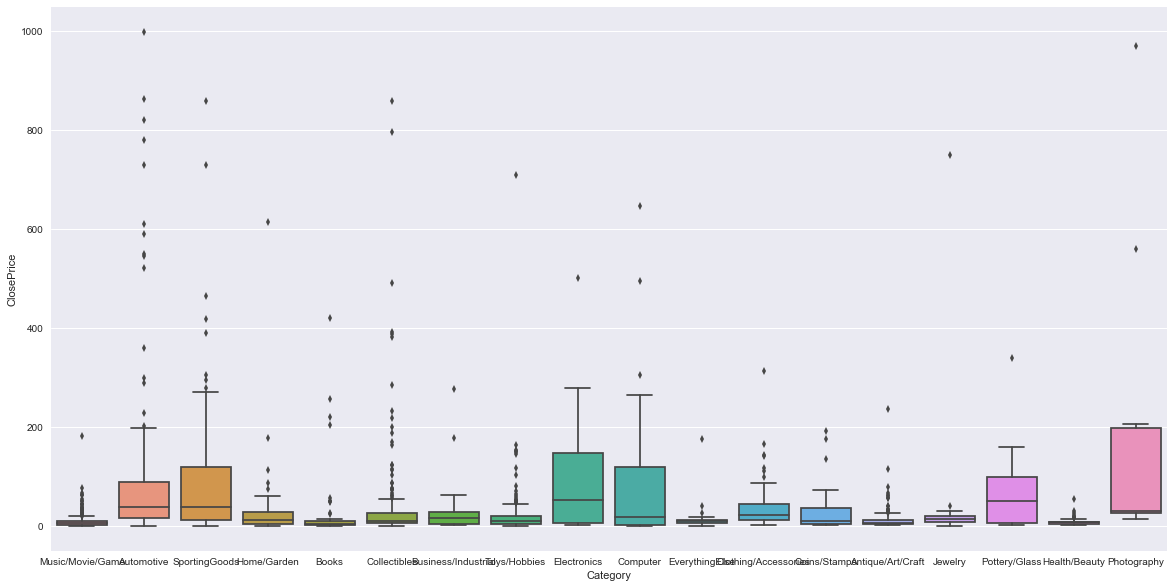

In [106]:
#What's the variability in price as per product category?
import seaborn as sns
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x = df.Category, y = df.ClosePrice)

# In light of the previous boxplot graph, we can extract some interesting conclusions:
- Variability in pricing in some categories like Music, Books and Health and Beauty are minimal
- Variability in pricing is highest in Electronics, Photography and Sporting goods
- The category that presents a highest number of outliers is Automotive, followed by Collectibles
- The category with the most items sold in the upper-range limit is Automotive
- In this dataset the category of Jewelry sells very low-priced items. Could it be that eBay is not the best place to sell such items, or that the dataset provided to us does not contain high-price items? Pending verification
- Antique category also sells low-price items. Could it be because it is mixed with art and crafts items, pushing the overal category price down?

In [107]:
#Let's verify the previous information by listing the top 20 items with the highest closing price, by category
df.sort_values(['ClosePrice','Category'], ascending = False).head(20)

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice
1971,Automotive,US,145,7,Sat,999.00,999.00
1920,Photography,US,14,5,Sat,971.00,9.99
1740,Automotive,EUR,45,5,Mon,863.28,1.23
512,SportingGoods,US,2378,1,Fri,860.00,0.01
513,Collectibles,US,119,10,Sat,860.00,0.01
1970,Automotive,US,57,7,Fri,820.00,650.00
1905,Collectibles,US,590,10,Fri,797.00,9.95
1963,Automotive,EUR,4,10,Sun,780.89,122.97
480,Jewelry,US,225,7,Mon,750.00,0.01
1718,Automotive,EUR,32,7,Mon,730.47,1.23


# What is the mean close price for each item category?

In [108]:
#Now let's find the top 10 categories for further anaylisis. What is the mean close price for each item category?
df.groupby('Category')['ClosePrice'].mean().sort_values(ascending = False).head(10)

Category
Photography             179.703846
Automotive               93.018876
Electronics              88.328364
SportingGoods            86.646129
Computer                 83.776389
Pottery/Glass            65.484000
Business/Industrial      40.149444
Collectibles             36.872720
Clothing/Accessories     34.650168
Coins/Stamps             31.088108
Name: ClosePrice, dtype: float64

In [109]:
# How many items have been sold in each category ABOVE the mean for that category?
print('Photography',df[(df['ClosePrice'] > 180) & (df['Category'] == 'Photography')].count()[0])
print('Automotive',df[(df['ClosePrice'] > 94) & (df['Category'] == 'Photography')].count()[0])
print('Electronics',df[(df['ClosePrice'] > 89) & (df['Category'] == 'Photography')].count()[0])
print('SportingGoods',df[(df['ClosePrice'] > 87) & (df['Category'] == 'Photography')].count()[0])
print('Computer',df[(df['ClosePrice'] > 84) & (df['Category'] == 'Photography')].count()[0])
print('Pottery/Glass',df[(df['ClosePrice'] > 66) & (df['Category'] == 'Photography')].count()[0])
print('Business/Industrial',df[(df['ClosePrice'] > 41) & (df['Category'] == 'Photography')].count()[0])
print('Collectibles',df[(df['ClosePrice'] > 37) & (df['Category'] == 'Photography')].count()[0])
print('Clothing/Accessories',df[(df['ClosePrice'] > 35) & (df['Category'] == 'Photography')].count()[0])
print('Coins/Stamps',df[(df['ClosePrice'] > 32) & (df['Category'] == 'Photography')].count()[0])

('Photography', 4)
('Automotive', 5)
('Electronics', 5)
('SportingGoods', 5)
('Computer', 5)
('Pottery/Glass', 6)
('Business/Industrial', 6)
('Collectibles', 6)
('Clothing/Accessories', 6)
('Coins/Stamps', 6)


# Out of the top 10 categories with the most sales, 5 of them had 6 sales above the mean for its category: Pottery, Business, Collectibles, Clothing and Coins.

In [110]:
#Now we'll create a new column, "PriceIncrease" to evaluate the disparity between the opening and closing prices for each item sold
df['PriceIncrease'] = df.ClosePrice - df.OpenPrice
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,PriceIncrease
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0.0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0.0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0.0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0.0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0.0


# Now with this new column we just created (PriceIncrease) we can evaluate which categories have the biggest price increases. This in turn helps us to deduce that a larger price increase will probably correlate with higher competition for that item

In [111]:
#Now from that data we can extract the most and least competitive categories...

print('')
print('MOST COMPETITION AMONG BUYERS CATEGORIES (largest opening and closing price difference)')
most_competitive = df.groupby('Category').PriceIncrease.mean().sort_values(ascending = False).head(5)
print(most_competitive)
print('')
print('LEAST COMPETITION AMONG BUYERS CATEGORIES (smallest opening and closing price difference)')
least_competitive = df.groupby('Category').PriceIncrease.mean().sort_values(ascending = True).head(5)
print(least_competitive)


MOST COMPETITION AMONG BUYERS CATEGORIES (largest opening and closing price difference)
Category
Photography      161.744615
SportingGoods     78.438306
Computer          75.694444
Electronics       71.212909
Automotive        37.470899
Name: PriceIncrease, dtype: float64

LEAST COMPETITION AMONG BUYERS CATEGORIES (smallest opening and closing price difference)
Category
Health/Beauty         1.388750
Music/Movie/Game      4.472457
Coins/Stamps          6.010811
Antique/Art/Craft     6.839605
Toys/Hobbies         10.684615
Name: PriceIncrease, dtype: float64


In [112]:
#Verifying the information above in more detail, what are the top 10 categories with the highest price increases?
df[['Category','PriceIncrease']].sort_values('PriceIncrease', ascending = False).head(10)

,Category,PriceIncrease
1920,Photography,961.01
1740,Automotive,862.05
512,SportingGoods,859.99
513,Collectibles,859.99
1905,Collectibles,787.05
480,Jewelry,749.99
1718,Automotive,729.24
474,Toys/Hobbies,709.99
1954,SportingGoods,680.00
1963,Automotive,657.92


In [113]:
#Is there a correlation between closing price and price increase? Yes. Anything above 80% is considered "strong positive correlation"
df['ClosePrice'].corr(df['PriceIncrease'])

0.90107467901168392

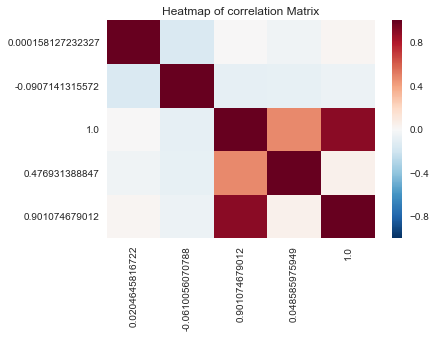

In [114]:
#This graph below is just the previous data in graphical form. 
#It does nothing useful, except prettify this notebook and check if you're paying attention!
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
           xticklabels = corr.PriceIncrease.values,
           yticklabels = corr.ClosePrice.values)
sns.plt.title('Heatmap of correlation Matrix')

# The only positive correlations that exists in this dataset happens to be between PriceIncrease and ClosePrice.

In [115]:
#On the subject of correlations...is there any correlation between the different columns at all? 
df.corr()

,sellerRating,Duration,ClosePrice,OpenPrice,PriceIncrease
sellerRating,1.000000,-0.149734,0.000158,-0.041113,0.020465
Duration,-0.149734,1.000000,-0.090714,-0.085289,-0.061006
ClosePrice,0.000158,-0.090714,1.000000,0.476931,0.901075
OpenPrice,-0.041113,-0.085289,0.476931,1.000000,0.048586
PriceIncrease,0.020465,-0.061006,0.901075,0.048586,1.000000


In [116]:
#Is there a positive correlation between PriceIncrease and SellerRating, or between ClosePrice and SellerRating? 
print('PriceIncrease and SellerRating correlation: ',df.sellerRating.corr(df.PriceIncrease))
print('ClosePrice and SellerRating correlation: ',df.sellerRating.corr(df.ClosePrice))


('PriceIncrease and SellerRating correlation: ', 0.020464581672220167)
('ClosePrice and SellerRating correlation: ', 0.00015812723232722415)


# According to the data, the seller rating has no significant correlation with how competitive a product is, or with its final selling price.


In [117]:
#What is the most common day to end the auction for each category?
df.groupby('Category')['endDay'].describe()

,count,unique,top,freq
Category,,,,
Antique/Art/Craft,177,7,Mon,57
Automotive,178,7,Fri,49
Books,54,7,Sun,12
Business/Industrial,18,7,Sun,9
Clothing/Accessories,119,7,Thu,25
Coins/Stamps,37,7,Thu,12
Collectibles,239,7,Sat,66
Computer,36,7,Sat,9
Electronics,55,7,Mon,16


# What are the items for each category, that have sold for the highest close price?

In [118]:
#What have been the 10 items sold for the highest ClosePrice in each category?
#From such table we could extract data about the ending auction day to sell our product for the highest ClosePrice 
df.groupby('Category').apply(lambda x: x.nlargest(10, 'ClosePrice'))

Category currency  sellerRating  Duration  \
Category                                                                     
Antique/Art/Craft 1933  Antique/Art/Craft      GBP           378         7   
                  1260  Antique/Art/Craft      EUR           524         5   
                  1125  Antique/Art/Craft      EUR           266         3   
                  1555  Antique/Art/Craft       US          2349         7   
                  1078  Antique/Art/Craft      EUR           266         3   
                  1075  Antique/Art/Craft      EUR           266         3   
                  1497  Antique/Art/Craft       US          2349         7   
                  1866  Antique/Art/Craft       US          2944         7   
                  1426  Antique/Art/Craft       US          2349         7   
                  1833  Antique/Art/Craft       US          4390         7   
Automotive        1971         Automotive       US           145         7   
                  1740         Automotive      EUR            45         5   
                  1970         Automotive       US            57         7   
                  1963         Automotive      EUR             4        10   
                  1718         Automotive      EUR            32         7   
                  1968         Automotive       US            21         5   
                  1962         Automotive       US             0        10   
                  1969         Automotive       US          1400         5   
                  1961         Automotive       US           374         7   
                  1966         Automotive       US           142         7   
Books             1958              Books       US           155         7   
                  1861              Books       US          1560         7   
                  1723              Books      GBP          1029         7   
                  1499              Books       US          1192         7   
                  1865              Books       US          2191         7   
                  1859              Books       US          2191         7   
                  1559              Books      GBP           201         7   
                  1743              Books       US             8         5   
                  749               Books      EUR           415        10   
                  1481              Books      EUR          1719         1   
...                                   ...      ...           ...       ...   
Pottery/Glass     1479      Pottery/Glass      GBP            36         7   
                  1950      Pottery/Glass       US           993         7   
                  1924      Pottery/Glass       US           993         7   
                  1925      Pottery/Glass       US           993         7   
                  1926      Pottery/Glass       US           993         7   
                  1927      Pottery/Glass       US           993         7   
                  1928      Pottery/Glass       US           993         7   
                  1895      Pottery/Glass       US           993         7   
                  1896      Pottery/Glass       US           993         7   
                  1894      Pottery/Glass       US           993         7   
SportingGoods     512       SportingGoods       US          2378         1   
                  1954      SportingGoods       US            71         7   
                  1687      SportingGoods       US          3162         5   
                  1964      SportingGoods       US             1         7   
                  338       SportingGoods       US          2378         3   
                  1597      SportingGoods       US         27132         5   
                  1591      SportingGoods       US         27132         5   
                  1585      SportingGoods       US           134         1   
                  1582      SportingGoods       US     

# What are the most profitable categories? According to our analysis below, the top 5 categories where there is a higher chance of price increasing (OpenPrice to ClosePrice) are Photography, SportingGoods, Computer, Electronics and Automotive

In [119]:
df.groupby('Category')['PriceIncrease'].mean().sort_values(ascending = False)

Category
Photography             161.744615
SportingGoods            78.438306
Computer                 75.694444
Electronics              71.212909
Automotive               37.470899
Collectibles             28.568285
Clothing/Accessories     26.913193
Business/Industrial      26.176111
Books                    21.013148
Home/Garden              20.808235
Pottery/Glass            17.878000
Jewelry                  13.493171
EverythingElse           11.714118
Toys/Hobbies             10.684615
Antique/Art/Craft         6.839605
Coins/Stamps              6.010811
Music/Movie/Game          4.472457
Health/Beauty             1.388750
Name: PriceIncrease, dtype: float64

# What are the top 5 LEAST profitable categories sellers should stay away from? The top 5 categories with the lowest mean price increases are Health/Beauty, Music/Movie/Game, Coins/Stamps, Antique/Art/Craft and Toys/Hobbies

In [120]:
#Lowest mean PriceIncrease categories
df.groupby('Category')['PriceIncrease'].mean().sort_values()

Category
Health/Beauty             1.388750
Music/Movie/Game          4.472457
Coins/Stamps              6.010811
Antique/Art/Craft         6.839605
Toys/Hobbies             10.684615
EverythingElse           11.714118
Jewelry                  13.493171
Pottery/Glass            17.878000
Home/Garden              20.808235
Books                    21.013148
Business/Industrial      26.176111
Clothing/Accessories     26.913193
Collectibles             28.568285
Automotive               37.470899
Electronics              71.212909
Computer                 75.694444
SportingGoods            78.438306
Photography             161.744615
Name: PriceIncrease, dtype: float64

# The most profitable auction ending day for our example category ('Automotive') is Monday, closely followed by Sunday. Interestingly, NONE of the auctions ending on Wednesday have a record for the top 20 highest-price-increase items sold in the category.

In [121]:
#What are the most profitable ending days for the 'Automotive' category?
test = df.groupby('Category')
test.get_group('Automotive')[['PriceIncrease','endDay']].sort_values('PriceIncrease', ascending = False).head(20)

,PriceIncrease,endDay
1740,862.05,Mon
1718,729.24,Mon
1963,657.92,Sun
1962,491.00,Sun
1961,445.00,Mon
1966,321.55,Sat
1968,310.00,Sat
1815,295.00,Fri
1493,198.00,Mon
1845,192.51,Sun


# As seen below, the ideal duration of an auction (highest number of that duration occurrences for the top 20 highest mean PriceIncrease items) is 7 days.

In [122]:
#What is the most profitable "Duration" for an auction?
test = df.groupby('Category')
test2 = test.get_group('Automotive')[['PriceIncrease','Duration']].sort_values('PriceIncrease', ascending = False).head(20)
test2.groupby('Duration').count()

,PriceIncrease
Duration,
1,1
3,1
5,5
7,8
10,5


# What items have had the highest ClosePrice AND PriceIncrease?

In [161]:
#What items have had the highest ClosePrice AND PriceIncrease
df[df['HighValueAndProfit'] == 'YES']

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,PriceIncrease,HighValueAndProfit
474,Toys/Hobbies,US,35,1,Fri,710.00,0.01,709.99,YES
480,Jewelry,US,225,7,Mon,750.00,0.01,749.99,YES
512,SportingGoods,US,2378,1,Fri,860.00,0.01,859.99,YES
513,Collectibles,US,119,10,Sat,860.00,0.01,859.99,YES
1718,Automotive,EUR,32,7,Mon,730.47,1.23,729.24,YES
1740,Automotive,EUR,45,5,Mon,863.28,1.23,862.05,YES
1905,Collectibles,US,590,10,Fri,797.00,9.95,787.05,YES
1920,Photography,US,14,5,Sat,971.00,9.99,961.01,YES
1954,SportingGoods,US,71,7,Sat,730.00,50.00,680.00,YES
1963,Automotive,EUR,4,10,Sun,780.89,122.97,657.92,YES


# Conclusion: What items to offer for auction and when to end the auction?

(Please note that the following information is based solely on the data provided to us for this exercise. We do not have information about the operating costs of the company, sourcing costs, staffing costs, etc that may affect profitability and thus should be accounted in a more in-depth nalysis)

According to our dataset, as sellers, in order to extract the maximum profit out of our items our company should concentrate on the Photography niche, setting our auction for a duration of 7 days and finishing it on a Sunday.

1) High PriceIncrease index

2) Low competition from other sellers: only 13 items for sale in the 'Photography' category, compared to more than 403 in 'Music/Movies' and 239 items for sale in the next most popular category, 'Collectibles'. 

3) Higher than average-value items.

We should avoid at all costs the least-profitable categories: Health/Beauty, Music/Movie/Game, Coins/Stamps, Antique/Art/Craft and Toys/Hobbies. 

MOST COMPETITION AMONG BUYERS CATEGORIES (largest opening and closing price difference)

Category

Photography      161.744615

SportingGoods     78.438306

Computer          75.694444

Electronics       71.212909

Automotive        37.470899

The 'Automotive' category also merits further investigation, since it seems to offer a high level of profitability (high PriceIncrease mean values and highest number of high-priced outliers). This category also has a relatively high mean price (as per category, of 93.01), and 5 items sold above the mean for the category (2d place, only after "photography")
However, it is worth noting that the competition among buyers is only 37.47, compared to the buyer's competition index for the 'Photography' category of 161.74.


...

HOW LONG SHOULD WE SELL FOR?

The most popular days for auctions to end are:

Mon    548

Sat    351

Sun    338

The most profitable auction ending day for our example category ('Automotive') is Monday, closely followed by Sunday. Pending further category-specific research, we could hyphotesize that we could obtain a market advantage by ending most of our auctions on Sunday, the second most profitable day. 

The reason is that although Monday is the most profitable auction-ending day, as we can see above it is also the day with the most other auctions ending. This fact could reduce the attention of the buyer away from our auction, reducing our profits.